# Instructions 

- Make sure you’re logged into Kaggle.
- Load the **Video Game Sales dataset** (CSV file is provided in the Kaggle input section).  
- Carefully read through each step and run the cells in order.  
- Do **not** skip steps — each builds on the previous one.  
- Add your own observations wherever possible, especially when exploring graphs.  
- Remember: This is practice for real-world data preprocessing + EDA, so try to think *why* each step is done, not just *how*.  
- At the end, feel free to explore further — add more plots, groupbys, or questions you want to answer!  



Welcome to your next checkpoint on the Synapse road!
Today we’re diving into the Video Game Sales dataset to practice real-world data preprocessing + EDA. Think of this like prepping ingredients before cooking — we’ll clean, slice, and plate the data so insights pop 🍽️

We’ll be using pandas, numpy, matplotlib, and seaborn for this task.
Run the following cell to import them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Alright, now that we’ve got our tools ready, let’s bring in the star of the show — the **Video Game Sales dataset** 🎮  

Your task:  
- Load the dataset into a pandas DataFrame.  
- Take a quick peek at the first few rows using.  
- Check the shape of the dataset to see how big this universe is.  

Think of this step as unboxing a new console — gotta see what’s inside first!  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_set=pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
df=pd.DataFrame(data_set)


In [4]:
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


### 🕹️ Level 1: Meet the Characters  

Now that we’ve unboxed our dataset, let’s get to know the **cast of characters**:  
- What kinds of columns do we have? (numeric, object, etc.)  
- How many missing values are there?  

Your task:  
- To get a quick overview of column types + null values.  
- To double-check the data types.  

This step is like reading the **character bios** before starting a game   


In [5]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### 🎯 Level 2: Quick Stats Check (Describe the Data)  

Every good gamer checks the **stats screen** before playing  
Now, let’s do the same for our dataset:  

Your task:  
- To get summary statistics for numerical columns.  
- Notice things like average sales, max values, and distribution hints.  

This is like peeking at the **scoreboard** — who’s leading, what’s the high score?   


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## 🧹 Level 3: Clean the Map (Missing Values)

Time to sweep the floor before we play.

**Your tasks:**
- Check how many missing values are in each column.
- For this dataset, handle missing values in **`Year`** and **`Publisher`** by removing those rows.
- Re-check to confirm there are **no missing values left**.

> Tip: Do a quick sanity check after cleaning (row count should drop a bit).


In [8]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df.shape

(16598, 11)

In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.shape

(16291, 11)

In [12]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## 🔢 Level 4: Patch the `Year` Column (Data Types)

`Year` often shows up as a float (e.g., `2008.0`) because of missing values earlier.

**Your tasks:**
- Convert **`Year`** to **integer**.
- Re-run a quick `info` to confirm the dtype change.

> If conversion fails, revisit Level 3 — some NaNs may still be lurking.


In [13]:
df['Year']=df['Year'].astype(int)

In [14]:
df.dtypes


Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


## 🎮 Level 5: Spotting the Legends  
Now that we’ve explored platforms and genres, let’s look at the **all-time best sellers**.  
Your task:  

List the **Top 5 best-selling video games**.  
We’ll display their **Name, Platform, Genre, and Global Sales**.  

Think of this as the **Hall of Fame of Video Games** 




In [15]:
top_5=df.nlargest(5,'Global_Sales')
print(top_5[['Name','Platform', 'Genre','Global_Sales']])

                       Name Platform         Genre  Global_Sales
0                Wii Sports      Wii        Sports         82.74
1         Super Mario Bros.      NES      Platform         40.24
2            Mario Kart Wii      Wii        Racing         35.82
3         Wii Sports Resort      Wii        Sports         33.00
4  Pokemon Red/Pokemon Blue       GB  Role-Playing         31.37



## 🎮 Level 6: Which Console Ruled the Game?  
Every console/platform has a legacy — but which one released the **most number of games**?  

Count the number of games released on each platform.  
Create a **bar chart** to visualize it.  
Finally, answer: **Which platform has the highest number of releases?** 

  


Platform
GG         1
PCFX       1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       27
DC        52
GB        97
NES       98
2600     116
WiiU     143
SAT      173
XOne     213
SNES     239
N64      316
PS4      336
PSV      410
3DS      499
GC       542
GBA      786
XB       803
PC       938
PS      1189
PSP     1197
X360    1234
Wii     1290
PS3     1304
PS2     2127
DS      2131
Name: Name, dtype: int64


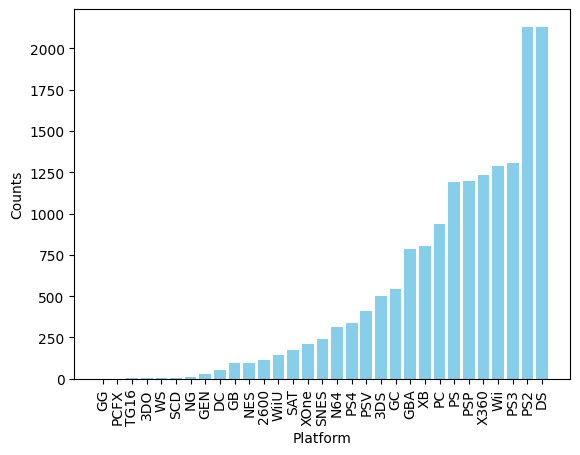

In [16]:

y=df.groupby("Platform")['Name'].count().sort_values()
print(y)

plt.figure()
plt.bar(y.index,y.values, color="skyblue")
plt.ylabel("Counts")
plt.xlabel("Platform")
plt.xticks(rotation=90)
plt.show()

Hence DS has the highest number of releases


## 🏢 Level 7: The Big Bosses (Top Publishers)  
Some publishers dominate the industry like final bosses 

Your task:  
- Find the **Top 5 publishers** with the highest **total Global Sales**.  
- Show their contribution using a **pie chart** 

This will help us see who really controlled the gaming world  


                     Publisher  Global_Sales
0                     Nintendo       1784.43
1              Electronic Arts       1093.39
2                   Activision        721.41
3  Sony Computer Entertainment        607.28
4                      Ubisoft        473.54


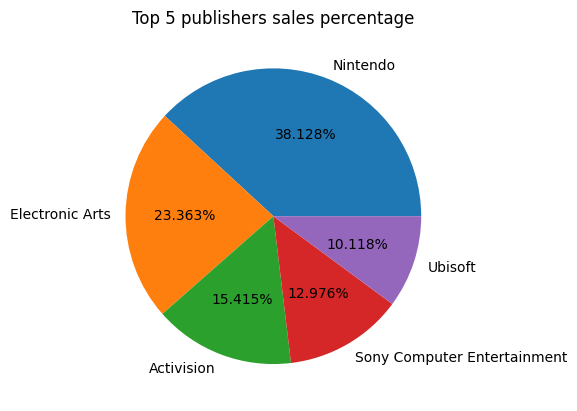

In [17]:
y = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).reset_index()
print(y.head())
plt.figure()
plt.pie(y.head(5)["Global_Sales"], labels=y.head(5)["Publisher"], autopct="%1.3f%%")
plt.title("Top 5 publishers sales percentage")
plt.show()


## 🌍 Level 8: Genre Champions in Europe  
Different genres have their own kings in different regions.  
Let’s focus on **Europe (EU Sales)** for now.  

Your task:  
- For **each Genre**, find the **Publisher** that has the highest **total EU Sales**.  
- Print the results as a list (Genre → Top Publisher).  

Think of this as awarding the **regional championship belts**  



In [18]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [19]:

def yo():
    for i in df['Genre'].unique():
        max_eu_sales=df.nlargest(1, "EU_Sales").reset_index()
        yield(max_eu_sales[['Publisher']])
lst=list()
for i in yo():
    lst.append(i["Publisher"])
j=0
for i in df['Genre'].unique():
    print(i+"-->")
    print(lst[j])
    j+=1


Sports-->
0    Nintendo
Name: Publisher, dtype: object
Platform-->
0    Nintendo
Name: Publisher, dtype: object
Racing-->
0    Nintendo
Name: Publisher, dtype: object
Role-Playing-->
0    Nintendo
Name: Publisher, dtype: object
Puzzle-->
0    Nintendo
Name: Publisher, dtype: object
Misc-->
0    Nintendo
Name: Publisher, dtype: object
Shooter-->
0    Nintendo
Name: Publisher, dtype: object
Simulation-->
0    Nintendo
Name: Publisher, dtype: object
Action-->
0    Nintendo
Name: Publisher, dtype: object
Fighting-->
0    Nintendo
Name: Publisher, dtype: object
Adventure-->
0    Nintendo
Name: Publisher, dtype: object
Strategy-->
0    Nintendo
Name: Publisher, dtype: object



## 🎯 Level 9: Nintendo’s Golden Year  
Nintendo is one of the biggest names in gaming 🎮  
But… which year did Nintendo achieve its **highest total Global Sales**?  

Your task:  
- Filter the dataset for **Publisher = Nintendo**.  
- Group sales by year.  
- Find the year with the **highest global sales**.  

This is like uncovering the **peak of Nintendo’s power**   



In [20]:
nintendoo=df[df['Publisher']=='Nintendo']
a=nintendoo.groupby('Year')['Global_Sales'].sum().idxmax()
print(f"{a} is the year with the highest global sales")


2006 is the year with the highest global sales



## 🏟️ Final Boss Arena: The Data Playground  

You’ve fought through all the levels ⚔️, now it’s time to explore on your own 🎉  

Your final mission:  
- Choose **any 2–3 plots** (your choice!) that show **interesting patterns** in the data.   

💡 This is your **creative zone** → Think of it as building your own “story” from the dataset.  

When you’re done, share your best plot with the team — let’s see who finds the coolest insight!  



**Below is a heatmap to illustrate the correlation between sales in one region to the sales in all other regions using heatmap**

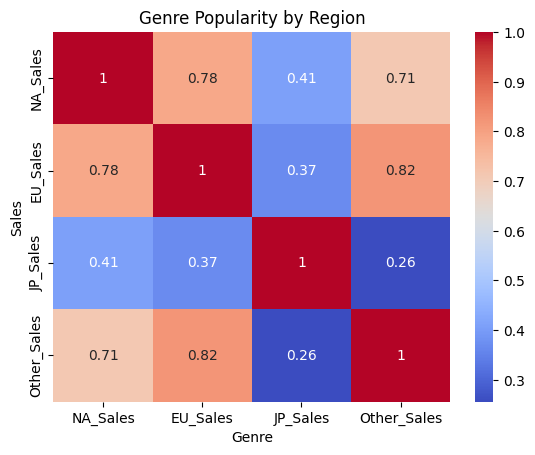

In [97]:
region_genre = df.groupby('Name')[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum().corr()
sns.heatmap(region_genre,annot=True,cmap='coolwarm')
plt.title("Genre Popularity by Region")
plt.ylabel("Sales")
plt.xlabel("Genre")
plt.show()


The heatplot shows that the EU and Other Regions have a strong direct relationship with each.

2)Below is the barplot to show rise in sales in each region as compared to the rise in number of releases in that year!

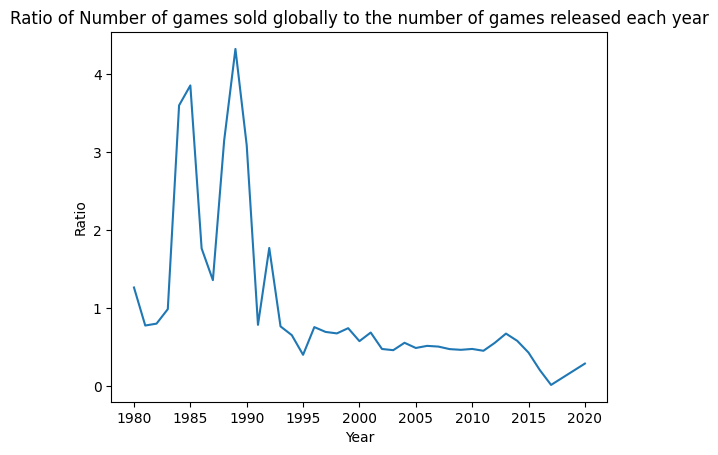

In [100]:
y=df.groupby("Year")['Global_Sales'].sum().reset_index()
x=df.groupby("Year")['Name'].count().reset_index()
ratio=y["Global_Sales"]/x["Name"]
plt.figure()
plt.title("Ratio of Number of games sold globally to the number of games released each year")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.plot(y["Year"],ratio)

Hence we can deduce that between 1980 and 1990 the trends are very volatile with games being more popular in the year 1984 and 1989

3)Which region has interests in which genre

<Axes: xlabel='Genre', ylabel='Sales in Millions'>

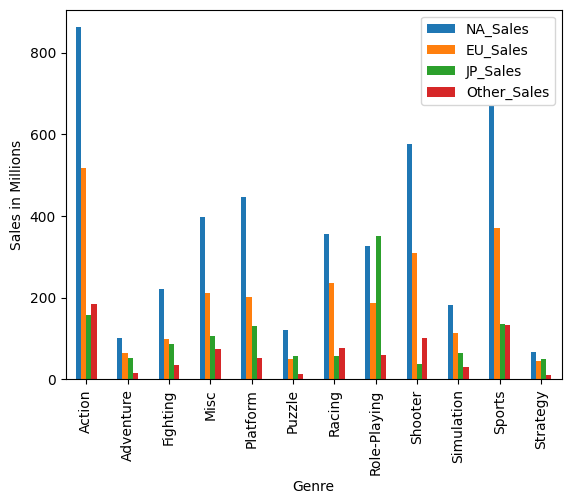

In [99]:
t=df.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
t.plot(kind="bar",ylabel="Sales in Millions")